[COVID-surge](https://github.com/dpploy/covid-surge) [https://github.com/dpploy/covid-surge] : V. F. de Almeida **14May20**

## Country COVID-19 Surge Period Analysis

$
  \newcommand{\Amtrx}{\boldsymbol{\mathsf{A}}}
  \newcommand{\Bmtrx}{\boldsymbol{\mathsf{B}}}
  \newcommand{\Cmtrx}{\boldsymbol{\mathsf{C}}}
  \newcommand{\Mmtrx}{\boldsymbol{\mathsf{M}}}
  \newcommand{\Imtrx}{\boldsymbol{\mathsf{I}}}
  \newcommand{\Pmtrx}{\boldsymbol{\mathsf{P}}}
  \newcommand{\Qmtrx}{\boldsymbol{\mathsf{Q}}}
  \newcommand{\Lmtrx}{\boldsymbol{\mathsf{L}}}
  \newcommand{\Umtrx}{\boldsymbol{\mathsf{U}}}
  \newcommand{\xvec}{\boldsymbol{\mathsf{x}}}
  \newcommand{\yvec}{\boldsymbol{\mathsf{y}}}
  \newcommand{\zvec}{\boldsymbol{\mathsf{z}}}
  \newcommand{\avec}{\boldsymbol{\mathsf{a}}}
  \newcommand{\bvec}{\boldsymbol{\mathsf{b}}}
  \newcommand{\cvec}{\boldsymbol{\mathsf{c}}}
  \newcommand{\rvec}{\boldsymbol{\mathsf{r}}}
  \newcommand{\norm}[1]{\bigl\lVert{#1}\bigr\rVert}
  \DeclareMathOperator{\rank}{rank}
  \DeclareMathOperator{\abs}{abs}
$

---
### Table of Contents<a id="toc"></a>
 - [1) Introduction.](#intro)
 - [2) Import COVID-19 data.](#data)
 - [3) Visualize data.](#plot)
 - [4) Fit model to data.](#fit)
 - [5) Analysis.](#analysis)
---

## [Introduction](#toc)<a id="intro"></a>

On-line COVID-19 data is used in this notebook, and a fit to the sigmoid function 
    
\begin{equation*}
\boxed{ f(t) = \frac{\alpha_0}{1 + \alpha_1\, e^{\alpha_2\,t} } }
\end{equation*}
   
is systematically made. The time between points where the function has maximum and minimum curvature is computed and reported as the **surge period**. This period is relevant to public health officials to decide how long measures to control the epidemic should be in place. In addition, the surge period provides insight in comparing how different communities react to the epidemic.

In [1]:
'''Load the covid-surge package'''
#!pip install --upgrade --quiet covid-surge

from covid_surge import Surge
%matplotlib inline

## [Import Data](#toc)<a id="data"></a>



In [2]:
'''Import data'''

# Get global surge data
g_surge = Surge('global')

print('# of countries: ',g_surge.cases.shape[1])
print('# of days:      ',g_surge.cases.shape[0])

# Set parameters
g_surge.end_date = '4/20/20'       # set end date wanted
g_surge.end_date = None            # get all the data available
g_surge.ignore_last_n_days = 2 # allow for data repo to be corrected/updated

print('********************************************************************')
print('*                        Single Country                            *')
print('********************************************************************')

name = 'Spain'
print(name)
print('')

# of countries:  188
# of days:       114
********************************************************************
*                        Single Country                            *
********************************************************************
Spain



## [Visualize Data](#toc)<a id="plot"></a>



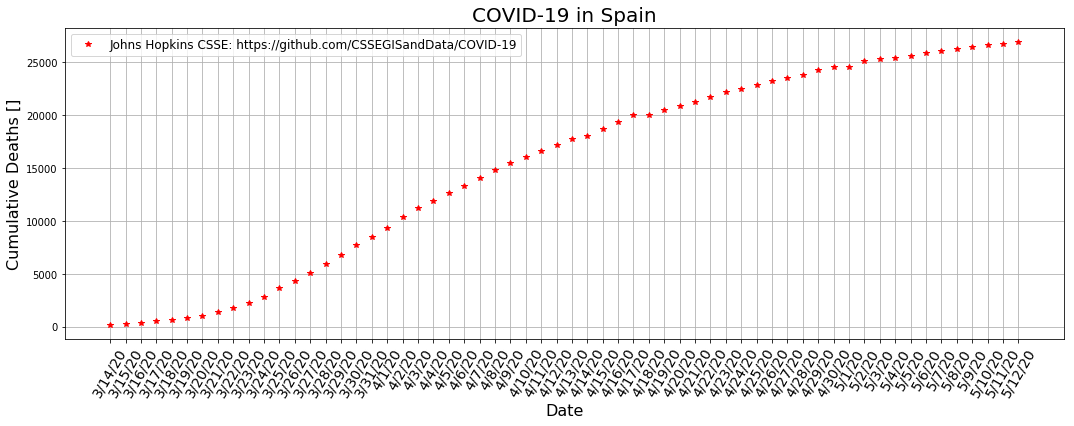


Last 7 days  # of cumulative cases =  [25857. 26070. 26299. 26478. 26621. 26744. 26920.]
Last 7 days  # of added cases = [213.0, 229.0, 179.0, 143.0, 123.0, 176.0]



In [3]:
'''Visualize data'''

# Plot the data
g_surge.plot_covid_data( name, save=True )

n_last_days = 7
country_id = g_surge.country_names.index(name)
print('')
print('Last %i days'%n_last_days,
          ' # of cumulative cases = ', g_surge.cases[-n_last_days:,country_id])
print('Last %i days'%n_last_days,
          ' # of added cases =',
          [b-a for (b,a) in zip( g_surge.cases[-(n_last_days-1):,country_id],
                                 g_surge.cases[-n_last_days:-1,country_id] )
    ])
print('')

## [Fit Data](#toc)<a id="fit"></a>


Unscaled root = [ 2.596e+04  2.038e+01 -1.271e-01]
R2            = 0.991



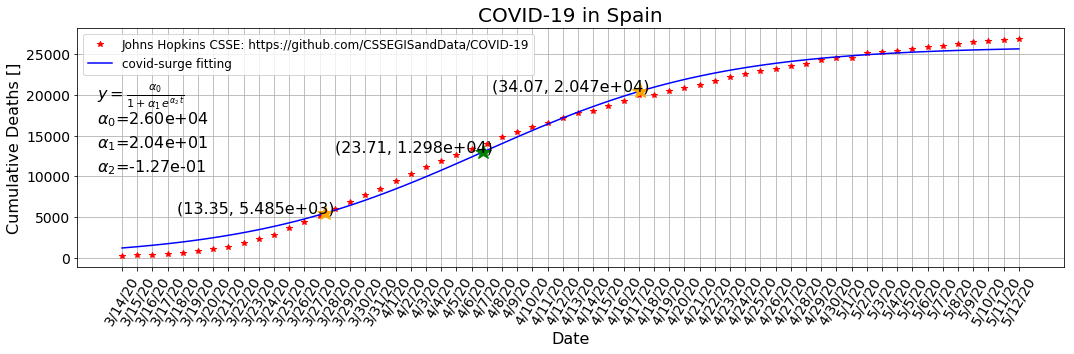

In [4]:
'''Fit data to model function'''

# Fit data to model function
param_vec = g_surge.fit_data( name )
print('')

# Plot the fit data to model function
g_surge.plot_covid_nlfit(name, param_vec)

## [Analysis](#toc)<a id="analysis"></a>

In [5]:
# Report critical times
(tc,dtc) = g_surge.critical_times( name, param_vec, verbose=True )

# Report errors 
g_surge.error_analysis( name, param_vec, tc, dtc )

# 60-day look-ahead
n_prediction_days = 60

last_day = g_surge.dates.size
total_deaths_predicted = int( g_surge.sigmoid_func(n_prediction_days + last_day, param_vec) )

print('')
print('Estimated cumulative deaths in %s days from %s = %6i'%(n_prediction_days,g_surge.dates[-1],total_deaths_predicted))
print('# of cumulative deaths today, %s               = %6i'%(g_surge.dates[-1],g_surge.cases[-1,g_surge.country_names.index(name)]))
print('')

Maximum growth rate            = 8.25e+02 [case/day]
Maximum normalized growth rate = 3.18e+00 [%/day]
Time at maximum growth rate    = 23.7 [day]
Date at maximum growth rate = 3/27/20 

Maximum growth acceleration            = 4.04e+01 [case/day^2]
Maximum normalized growth acceleration = 1.55e-01 [%/day^2]
Time at maximum growth accel.          = 13.4 [day]
Shifted time at maximum growth accel.  = -10.4 [day]
Date at maximum growth accel. = 3/17/20 


Minimum growth acceleration            = -4.04e+01 [case/day^2]
Minimum normalized growth acceleration = -1.55e-01 [%/day^2]
Time at minimum growth accel.          = 34.1 [day]
Shifted time at maximum growth accel.  = 10.4 [day]
Date at minimum growth accel. = 4/7/20 

Surge period = 20.7 [day]

Pointwise Error Analysis

Total error
mean relative error [%] = 41.18
std  relative error [%] = 99.97

Pre-exponential error
mean relative error [%] = 163.26
std  relative error [%] = 152.84

Post-linear error
mean relative error [%] =  2.92
std

In [6]:
print('Acceleration period = %4.1f [day]'%(tc-dtc))
print('Surge period        = %4.1f [day]'%(2*dtc))
print('Total period        = %4.1f [day]'%(tc-dtc+2*dtc))

Acceleration period = 13.4 [day]
Surge period        = 20.7 [day]
Total period        = 34.1 [day]
